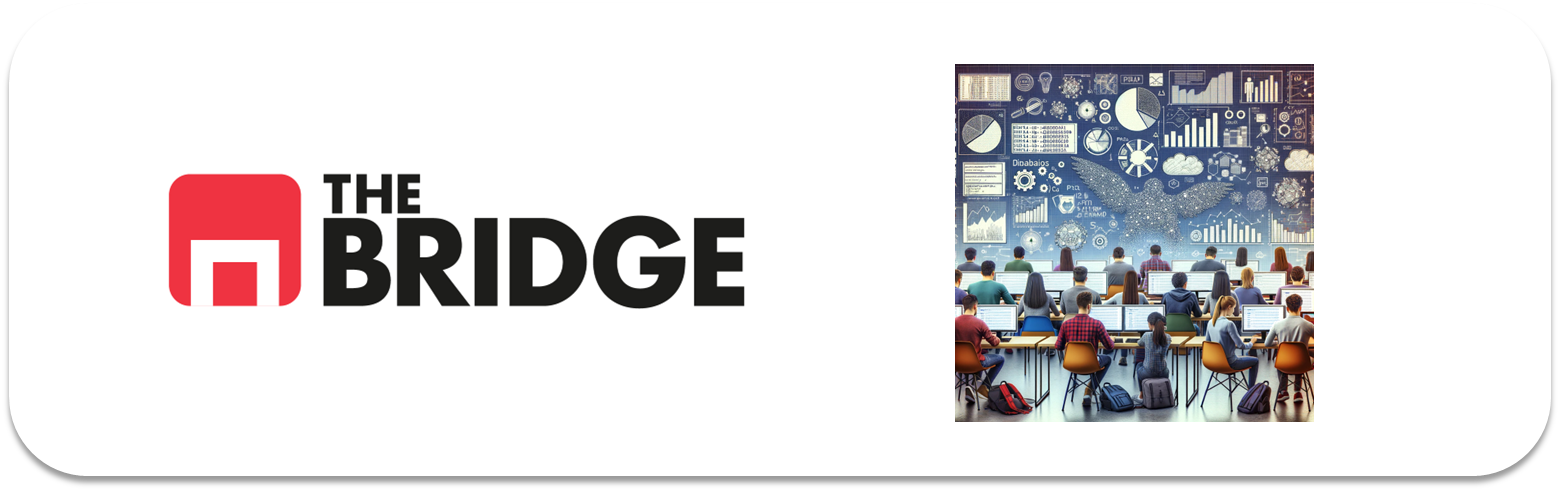

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [358]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [361]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\DataScience\THE_BRIDGE\Ejercicios\sprint_010\2\titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [362]:
#Limpiar
to_keep = ['survived','pclass','sex','age','sibsp','fare','embark_town','alone']
dfml = df[to_keep]
dfml

,survived,pclass,sex,age,sibsp,fare,embark_town,alone
0,0,3,male,22.0,1,7.2500,Southampton,False
1,1,1,female,38.0,1,71.2833,Cherbourg,False
2,1,3,female,26.0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,53.1000,Southampton,False
4,0,3,male,35.0,0,8.0500,Southampton,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,True
887,1,1,female,19.0,0,30.0000,Southampton,True
888,0,3,female,NaN,1,23.4500,Southampton,False
889,1,1,male,26.0,0,30.0000,Cherbourg,True


In [363]:
dfml.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [364]:
dfml['sex'] = dfml['sex'].map({'male': 0, 'female': 1})
dfml['embark_town']=dfml['embark_town'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})
mean = dfml['age'].mean() 
dfml['age'] = dfml['age'].fillna(mean)
dfml['embark_town'] = dfml['embark_town'].fillna(0)
dfml

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1156\3633526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfml['sex'] = dfml['sex'].map({'male': 0, 'female': 1})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1156\3633526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfml['embark_town']=dfml['embark_town'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1156\3633526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,survived,pclass,sex,age,sibsp,fare,embark_town,alone
0,0,3,0,22.000000,1,7.2500,0.0,False
1,1,1,1,38.000000,1,71.2833,1.0,False
2,1,3,1,26.000000,0,7.9250,0.0,True
3,1,1,1,35.000000,1,53.1000,0.0,False
4,0,3,0,35.000000,0,8.0500,0.0,True
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,13.0000,0.0,True
887,1,1,1,19.000000,0,30.0000,0.0,True
888,0,3,1,29.699118,1,23.4500,0.0,False
889,1,1,0,26.000000,0,30.0000,1.0,True


<Axes: xlabel='survived', ylabel='count'>

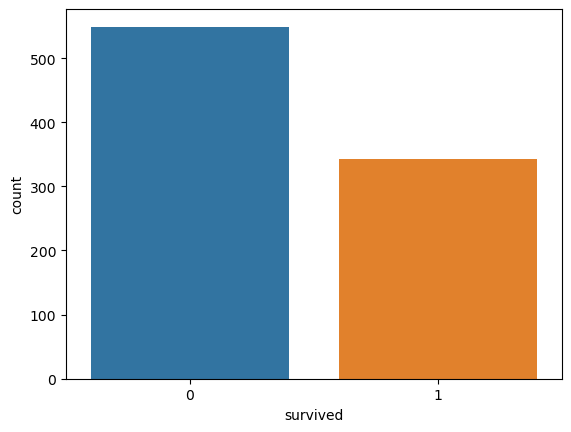

In [365]:
#Target
target = 'survived'

sns.countplot(x=target, data=dfml)

In [366]:
X = dfml.drop([target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
#mini eda
df_eda = X_train.copy()
df_eda[target] = y_train.copy()

In [371]:
corr = np.abs(df_eda.corr(numeric_only=True)[target].sort_values(ascending=False))
bad_corr_feat = corr[corr < 0.05].index.values

df_eda.drop(columns=bad_corr_feat, inplace= True)

<Axes: >

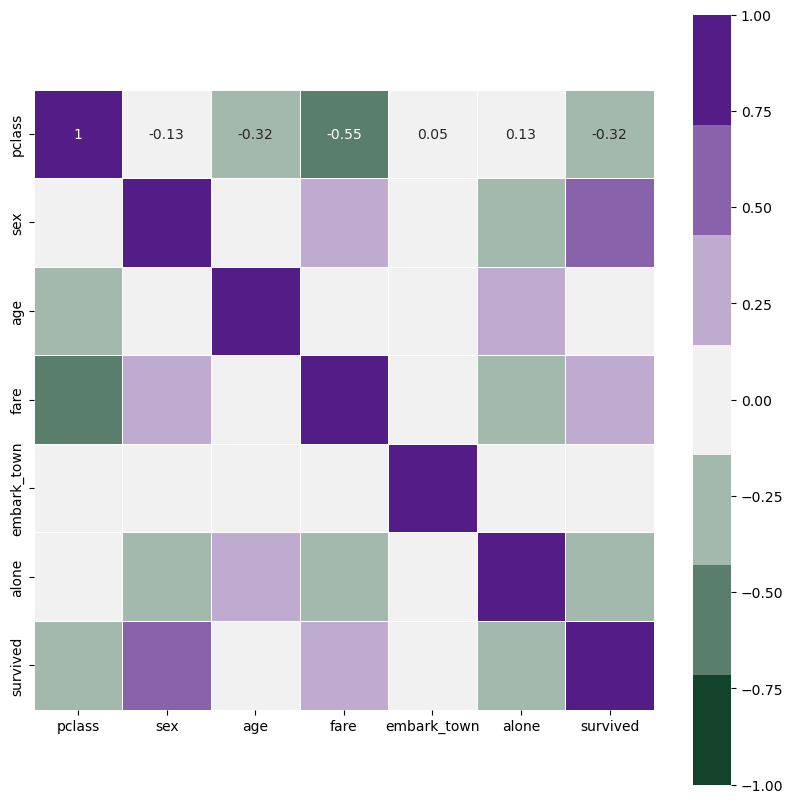

In [373]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(numeric_only=True), 2),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           square=True,
           linewidths=.5)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

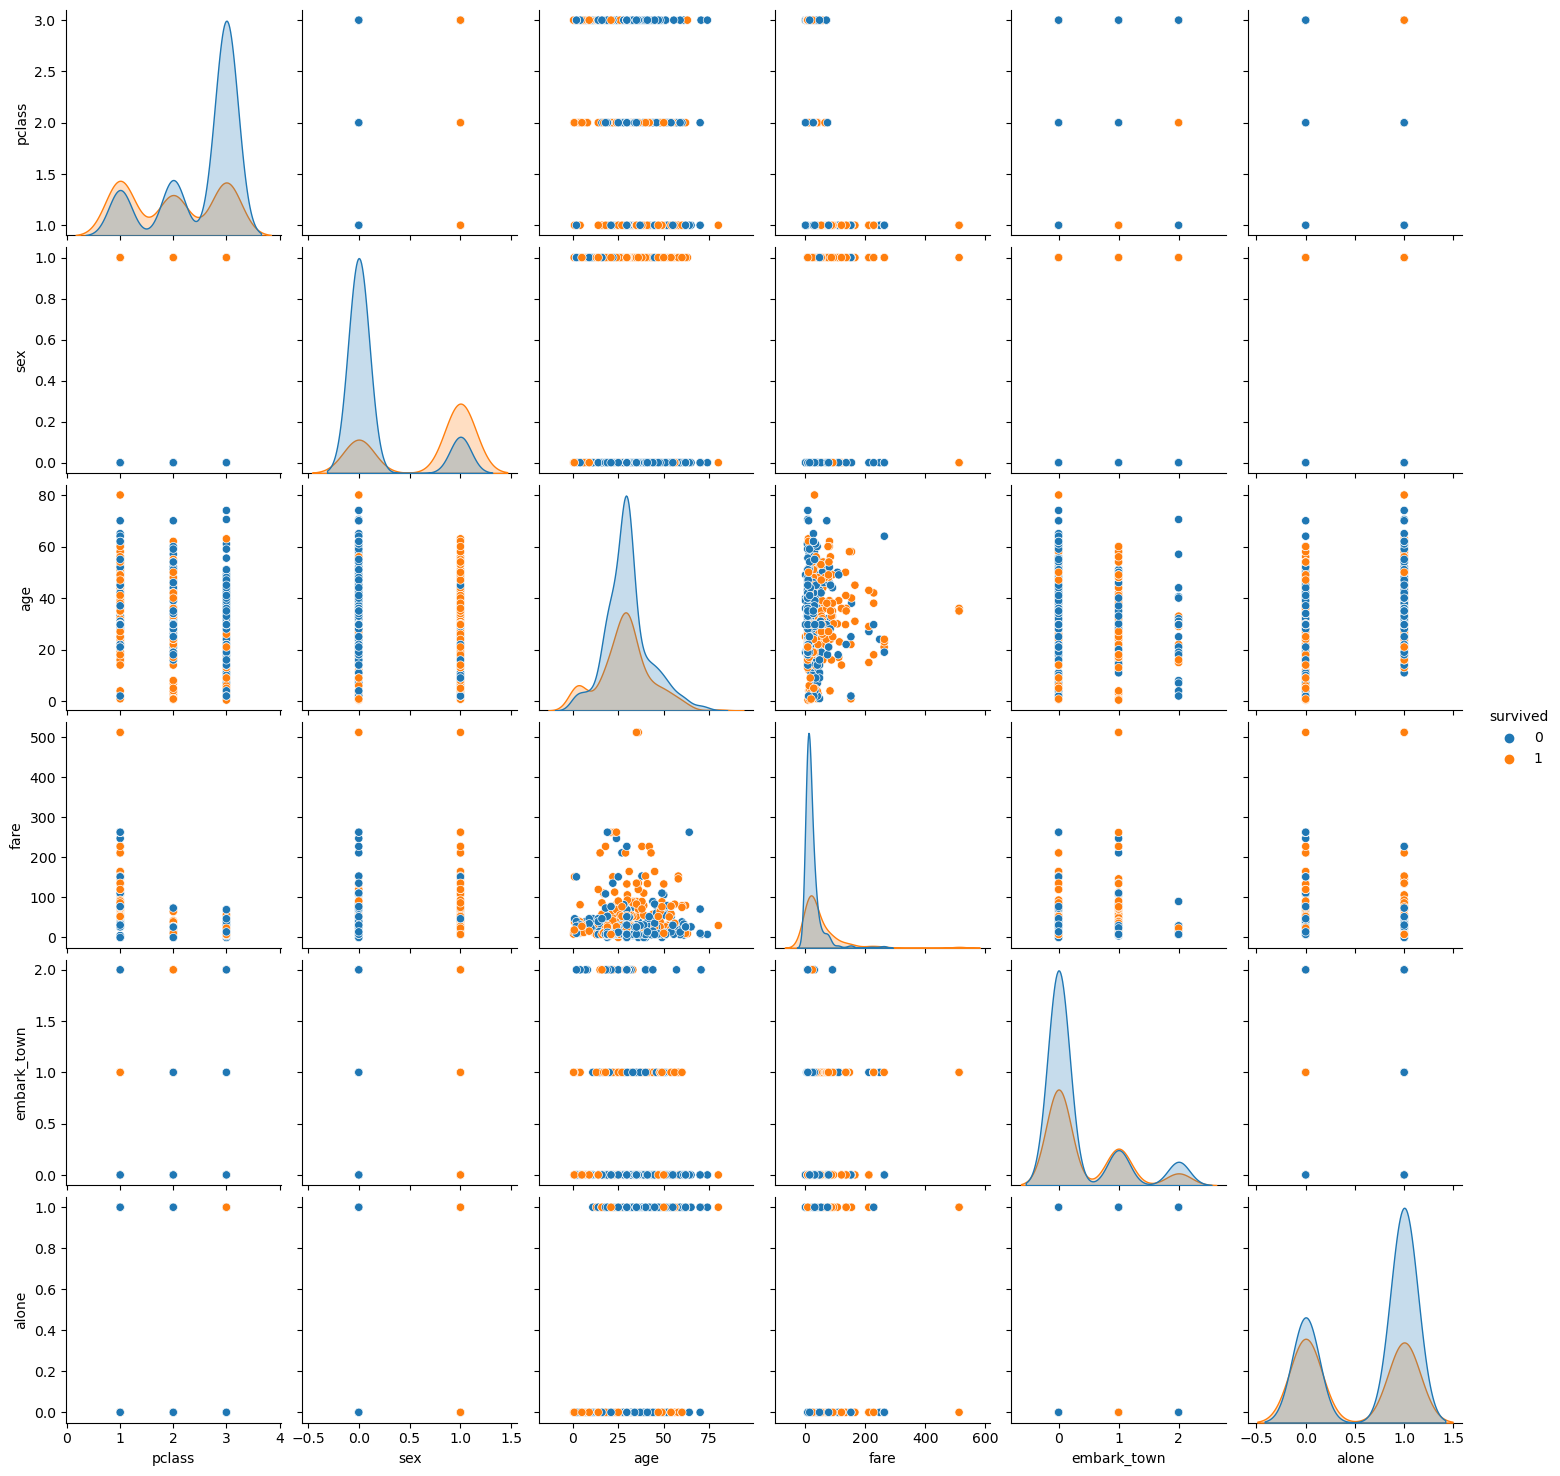

In [374]:
sns.pairplot(df_eda, hue=target)

In [375]:
features_num = [col for col in df_eda.columns if target not in col]
X_train = X_train[features_num].copy()

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'embark_town'}>, <Axes: >]], dtype=object)

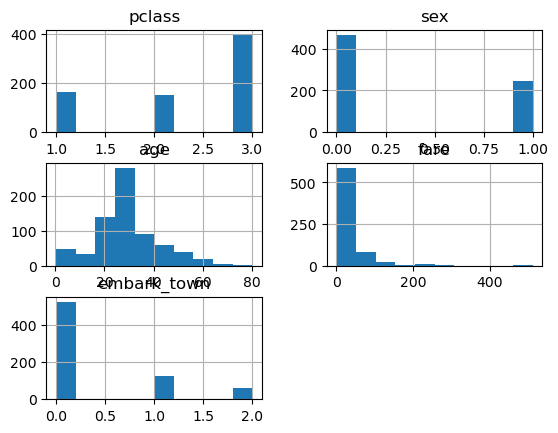

In [376]:
X_train.hist()

In [377]:
X_train.describe()

,pclass,sex,age,fare,embark_town
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,0.344101,29.538225,32.586276,0.344101
std,0.824584,0.475408,12.994548,51.969529,0.628323
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.925000,0.000000
50%,3.000000,0.000000,29.699118,14.454200,0.000000
75%,3.000000,1.000000,35.000000,30.500000,1.000000
max,3.000000,1.000000,80.000000,512.329200,2.000000


<Axes: >

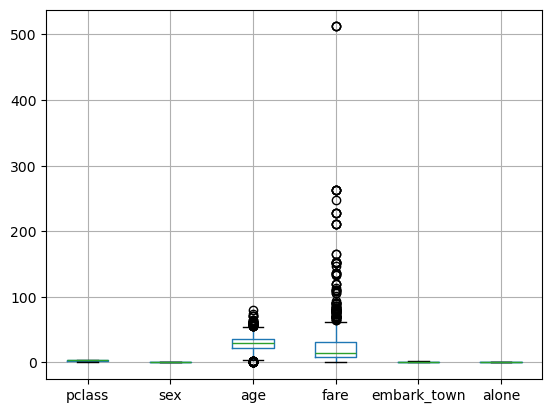

In [378]:
X_train.boxplot()

In [379]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   sex          712 non-null    int64  
 2   age          712 non-null    float64
 3   fare         712 non-null    float64
 4   embark_town  712 non-null    float64
 5   alone        712 non-null    bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 34.1 KB


In [380]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [381]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-1.03493410e+00  2.46273557e+00 -2.64167924e-02  8.24625114e-04
   3.04189416e-01  6.64827717e-02]]
[1.49937259]
[0 1]


In [384]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient'].copy())
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
sex,2.462736
pclass,1.034934
embark_town,0.304189
alone,0.066483
age,0.026417


<BarContainer object of 6 artists>

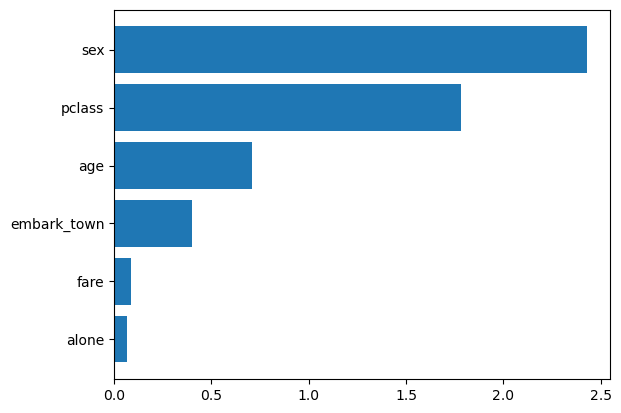

In [385]:
stdevs = []

for i in X_train.columns:
    stdev = dfml[i].std()
    stdevs.append(stdev)

features['stdev'] = np.array(stdevs).reshape(-1,1)
features['importance'] = features['coefficient'] * features['stdev']
features['importance_standarized'] = features['importance']/y_train.std()

features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized)


In [387]:
X_test = X_test[X_train.columns].copy()

In [413]:
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3) #el tres para redondear decimales
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

Accuracy train: 0.791
Accuracy test: 0.799


In [415]:
y_train.value_counts(True)

survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64

In [417]:
y_test.value_counts(True)

survived
0    0.586592
1    0.413408
Name: proportion, dtype: float64

In [ ]:
### Conjuntos desequilibrados, sin embargo la accuracy es relativamente buena. No produce overfitting ni underfitting